In [1]:
from validation.TensileExperimental import TensileExperimental
import numpy as np
from scipy.optimize import minimize,basinhopping
import pandas as pd

In [2]:
r = TensileExperimental()

df       = r["df"]
df_stats = r["df_stats"]

# Get the data
layers = df_stats["layers"]
layers[0] = ["Y","Y"]
df_stats["layers"] = layers

ni = df_stats["ni"]
ni[0] = 2
df_stats["ni"] = ni

delta = df_stats["v [X,SX,Y,SY]"]
delta[0] = [0,0,2,0]
df_stats["v [X,SX,Y,SY]"] = delta

C:\Users\djoroya\AppData\Local\Temp\ipykernel_14856\4098736568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers[0] = ["Y","Y"]
C:\Users\djoroya\AppData\Local\Temp\ipykernel_14856\4098736568.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  layers[0] = ["Y","Y"]
C:\Users\djoroya\AppData\Local\Temp\ipykernel_14856\4098736568.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ni[0] = 2
C:\Users\djoroya\AppData\Local\Te

In [3]:
df_stats.round(2)

Et [GPa]       t [mm]         % e       St [MPa]              layers  \
         mean   std   mean   std  mean   std     mean    std                
Name                                                                        
TFP1     2.89  0.23   5.27  0.06  0.12  0.01   279.10  14.34       [Y, Y]   
TFP2     2.26  0.07   4.70  0.00  0.09  0.00   153.36   0.47       [Y, X]   
TFP3     2.00  0.00   4.83  0.06  0.09  0.00   137.11   5.00      [Y, SX]   
TFP4     2.45  0.11   4.70  0.00  0.10  0.01   184.40   1.36      [Y, SY]   
TFP5     1.63  0.12   5.70  0.00  0.09  0.01    99.99   9.79  [Y, SX, SY]   
TFP6     1.74  0.07   5.60  0.00  0.09  0.01   104.51   7.71   [Y, X, SY]   

     v [X,SX,Y,SY] ni  
                       
Name                   
TFP1  [0, 0, 2, 0]  2  
TFP2  [1, 0, 1, 0]  2  
TFP3  [0, 1, 1, 0]  2  
TFP4  [0, 0, 1, 1]  2  
TFP5  [0, 1, 1, 1]  3  
TFP6  [1, 0, 1, 1]  3

In [4]:
12/15

0.8

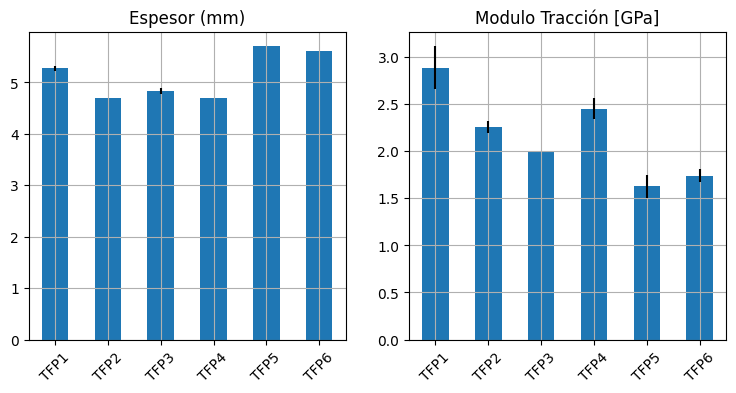

In [5]:
from validation.TensileExperimental import TensilePlotData

TensilePlotData(df_stats)

In [6]:
# only thin 

ni = df_stats["ni"].values
tau_exp = df_stats["t [mm]"]["mean"].values

tau_pred_fcn = lambda tn,tl: tn + 2*tl*ni

In [7]:
from validation.experimental import  nucleo
E_nucleo_exp_Mpa = nucleo()["young modulus [MPa]"]
E_nucleo_exp = E_nucleo_exp_Mpa/1000
print(E_nucleo_exp)

0.8


In [8]:
from validation.experimental import manual_data

t_nucleo_exp = manual_data()["t_nucleo [mm]"]

In [9]:
# min square error


def objective(tn,tl):
    return sum(((tau_pred_fcn(tn,tl) - tau_exp)/tau_exp )**2)

x0 = [0,0]
#
x0 = 2*np.random.rand(2)

bound  = [(0.95*t_nucleo_exp, t_nucleo_exp*1.05), # tn
          (0, None)] # tl




tn_opt = 2.934
tl_opt = 0.475



In [10]:
print("Optimal tn: ", tn_opt)
print("Optimal tl: ", tl_opt)

tau_pred = tau_pred_fcn(tn_opt,tl_opt)

Optimal tn:  2.934
Optimal tl:  0.475


In [11]:
# Tau predicted
print("Tau predicted: ", tau_pred)
print("Tau experimental: ", tau_exp)

df_exp = pd.DataFrame({"tau_exp": tau_exp, "tau_pred": tau_pred})
df_exp["error [%]"] = 100*abs(df_exp["tau_exp"] - df_exp["tau_pred"]) / df_exp["tau_exp"]
# round to 2 decimals
df_exp = df_exp.round(2)
df_exp

Tau predicted:  [4.834 4.834 4.834 4.834 5.784 5.784]
Tau experimental:  [5.26666667 4.7        4.83333333 4.7        5.7        5.6       ]


,tau_exp,tau_pred,error [%]
0,5.27,4.83,8.22
1,4.70,4.83,2.85
2,4.83,4.83,0.01
3,4.70,4.83,2.85
4,5.70,5.78,1.47
5,5.60,5.78,3.29


In [12]:
def modelSX(E_resina, E_carbon):
    return 0.00e+00 + \
           1.54e-03*E_resina + \
           1.02e-05*E_carbon - \
           2.08e-07*E_resina**2 + \
           1.82e-08*E_resina*E_carbon - \
           4.05e-10*E_carbon**2


def modelSY(E_Resina,E_Carbon):
    return 0.00e+00 + \
           1.52e-03*E_Resina + \
           1.14e-05*E_Carbon - \
           1.98e-07*E_Resina**2 + \
           1.71e-08*E_Resina*E_Carbon - \
           3.80e-10*E_Carbon**2

def ModelY(E_resina,E_carbon):
    v_frac = 0.3575
    E = (1- v_frac)*E_resina + v_frac*E_carbon
    return E

def ModelX(E_resina,E_carbon):
    t_l = 0.475 #  Espesor de la capa [mm]
    A_s = 0.283 # mm^2
    L =10 # mm
    r = 3*t_l/8 
    d = (A_s - np.pi*r**2)/(2*r) # Area de la capa [mm^2]

    f_c = 6*(d+2*r)/L
    E_h = 1/(f_c/E_carbon + (1-f_c)/E_resina)
    E = (2*E_resina*(t_l - 2*r) + 2*E_h*r)/t_l
    return E

In [13]:
def E_effective_j(En,Eresina,Efibra,j):
    


    delta_j  = df_stats["v [X,SX,Y,SY]"].iloc[j]
    
    tau_j    = tau_pred[j]

    layers = df_stats["layers"].iloc[j]
    # unique 
    layers = list(dict.fromkeys(layers))
    
    E_SX = modelSX(Eresina,Efibra)
    E_SY = modelSY(Eresina,Efibra)
    E_X  = ModelX(Eresina,Efibra)
    E_Y  = ModelY(Eresina,Efibra)

    E_vec = np.array([ E_X, E_SX, E_Y, E_SY])
        

    return (En*tn_opt + 2*tl_opt*(np.dot(delta_j,E_vec)))/tau_j

def E_effective(En,Eresina,Efibra):

    return np.array([E_effective_j(En,Eresina,Efibra,j) for j in range(len(df_stats))])


In [14]:
E_eff_exp = df_stats["Et [GPa]"]["mean"].values

Eresina = 100 # GPa
Efibra = 2000 # GPa
En_0 = 1000

E_eff_pred = E_effective(En_0,Eresina,Efibra)

In [15]:
from validation.experimental import  nucleo
E_nucleo_exp_Mpa = nucleo()["young modulus [MPa]"]
E_nucleo_exp = E_nucleo_exp_Mpa/1000
print(E_nucleo_exp)

0.8


In [16]:
# minimize 
def objective_E(En,Eresina,Efibra):

    # E_SX and E_SY similar 
    # dE_S = Evec[1] - Evec[3]
    dE =   Eresina - Efibra
    # Efibra > Eresina
    return sum((E_effective(En,Eresina,Efibra) - E_eff_exp)**2)   + 1e4*np.max([0,dE])**2 

x0 = np.random.rand(3)
# must be positive 
# v [X,SX,Y,SY]
eps = 0.001
bounds = [  (E_nucleo_exp*0.9,1.1*E_nucleo_exp), # En
            (eps,None), # Evec[0]   # Eresina
            (eps,None), # Evec[1]   # Efibra
            ]

minimize_kwargs = { 
    'method':'Nelder-Mead',
    'bounds': bounds
}

res = basinhopping(lambda x: objective_E(x[0],x[1],x[2]),
                x0, 
                minimizer_kwargs=minimize_kwargs,
                niter=50)


En_opt = res.x[0]
Eresina_opt = res.x[1]
Efibra_opt = res.x[2]


E_eff_pred = E_effective(En_opt,Eresina_opt,Efibra_opt)

c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\scipy\optimize\_basinhopping.py:294: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


In [17]:
Evec_opt = np.array([ModelX(Eresina_opt,Efibra_opt),
                        modelSX(Eresina_opt,Efibra_opt), 
                        ModelY(Eresina_opt,Efibra_opt), 
                        modelSY(Eresina_opt,Efibra_opt)])

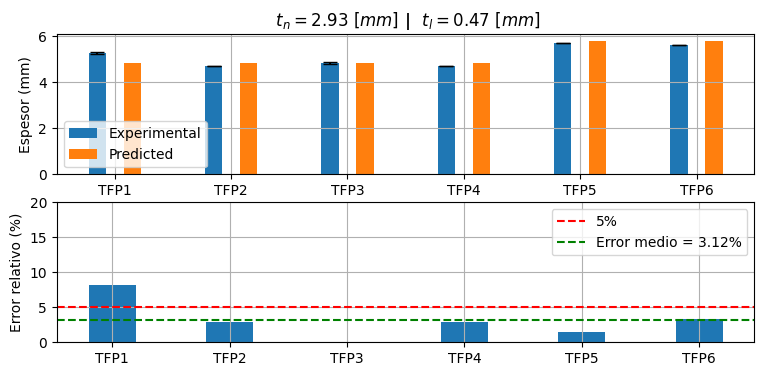

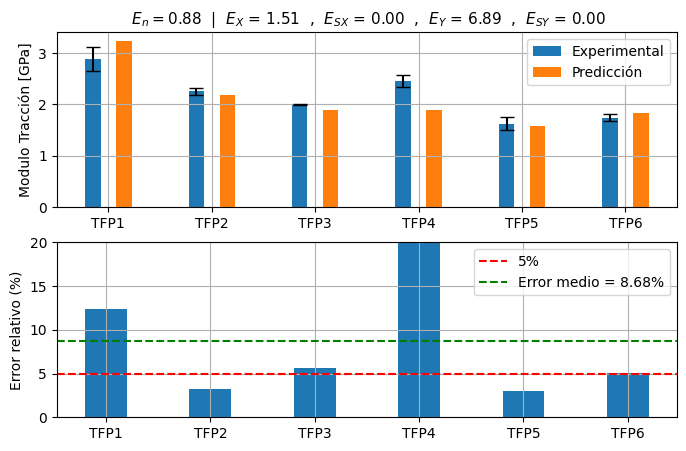

In [18]:
from AnalyticalLayers.plot_E import plot_E
from AnalyticalLayers.plt_thin import plt_thin

plt_thin(df_stats, tau_exp, tau_pred, tn_opt, tl_opt)
plot_E(df_stats, E_eff_exp, E_eff_pred, Evec_opt, En_opt)

In [19]:
print("Optimal En: ", En_opt)
print("Optimal Evec: ", Evec_opt)
print("Optimal tn: ", tn_opt)
print("Optimal tl: ", tl_opt)

Optimal En:  0.8800000000000001
Optimal Evec:  [1.51478018e+00 1.34836309e-03 6.89088404e+00 1.35472170e-03]
Optimal tn:  2.934
Optimal tl:  0.475


In [25]:
df_layers = pd.DataFrame({"Evec [GPa]": Evec_opt}, index=["X","SX","Y","SY"])
# add nuclueo
df_layers.loc["Nucleo"] = [En_opt]
df_layers.round(5)

,Evec [GPa]
X,1.51478
SX,0.00135
Y,6.89088
SY,0.00135
Nucleo,0.88000


In [21]:
df_thickness = pd.DataFrame({"t [mm]": [tn_opt, tl_opt]}, index=["Nucleo","Capas"])

df_thickness.round(2)

,t [mm]
Nucleo,2.93
Capas,0.48


In [22]:
df_mat = pd.DataFrame({"E [GPa]": [Eresina_opt, Efibra_opt]}, index=["Resina","Fibra"])
df_mat.round(2)

,E [GPa]
Resina,0.76
Fibra,17.91


In [23]:
df_pred = {
    "Name"          : df_stats.index,
    "E pred [GPa]"  : E_eff_pred,
    "E exp [GPa]"   : E_eff_exp,
    "E e rel [%]"   : 100*abs(E_eff_exp - E_eff_pred)/E_eff_exp,
    "t pred [mm]"   : tau_pred,
    "t exp [mm]"    : tau_exp,
    "t e rel [%]"   : 100*abs(tau_exp - tau_pred)/tau_exp
}
df_pred = pd.DataFrame(df_pred)
# decimals1
df_pred = df_pred.round(2)
df_pred

,Name,E pred [GPa],E exp [GPa],E e rel [%],t pred [mm],t exp [mm],t e rel [%]
0,TFP1,3.24,2.89,12.37,4.83,5.27,8.22
1,TFP2,2.19,2.26,3.21,4.83,4.70,2.85
2,TFP3,1.89,2.00,5.59,4.83,4.83,0.01
3,TFP4,1.89,2.45,22.96,4.83,4.70,2.85
4,TFP5,1.58,1.63,2.95,5.78,5.70,1.47
5,TFP6,1.83,1.74,5.02,5.78,5.60,3.29


In [24]:
Em_error = np.mean(df_pred["E e rel [%]"])
tm_error = np.mean(df_pred["t e rel [%]"])

from loadsavejson.savejson import savejson

savejson({"layers":df_layers, 
            "errors": {"E":Em_error, "t":tm_error},
          "thickness":df_thickness},
          "df_opt_fix_thin.json")